# Fraud detection

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score,f1_score,precision_score
#Visualization
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import auc
from sklearn import metrics

In [3]:
df = pd.read_csv('creditcard.csv')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.drop(['Time'], axis=1, inplace=True)

In [6]:
df.shape

(284807, 30)

In [7]:
selected_vars =['V4','V14','V10','V16','V9','V12','V11','V17','V7','V21','V18','V8','V1','V3','V6','V2','V27','V5','V26']

In [8]:
df1=df[selected_vars]
Target=df['Class']
df.drop('Class',axis=1, inplace=True)

In [9]:
df1.head()

,V4,V14,V10,V16,V9,V12,V11,V17,V7,V21,V18,V8,V1,V3,V6,V2,V27,V5,V26
0,1.378155,-0.311169,0.090794,-0.470401,0.363787,-0.617801,-0.551600,0.207971,0.239599,-0.018307,0.025791,0.098698,-1.359807,2.536347,0.462388,-0.072781,0.133558,-0.338321,-0.189115
1,0.448154,-0.143772,-0.166974,0.463917,-0.255425,1.065235,1.612727,-0.114805,-0.078803,-0.225775,-0.183361,0.085102,1.191857,0.166480,-0.082361,0.266151,-0.008983,0.060018,0.125895
2,0.379780,-0.165946,0.207643,-2.890083,-1.514654,0.066084,0.624501,1.109969,0.791461,0.247998,-0.121359,0.247676,-1.358354,1.773209,1.800499,-1.340163,-0.055353,-0.503198,-0.139097
3,-0.863291,-0.287924,-0.054952,-1.059647,-1.387024,0.178228,-0.226487,-0.684093,0.237609,-0.108300,1.965775,0.377436,-0.966272,1.792993,1.247203,-0.185226,0.062723,-0.010309,-0.221929
4,0.403034,-1.119670,0.753074,-0.451449,0.817739,0.538196,-0.822843,-0.237033,0.592941,-0.009431,-0.038195,-0.270533,-1.158233,1.548718,0.095921,0.877737,0.219422,-0.407193,0.502292


Final Dataframe

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V4      284807 non-null  float64
 1   V14     284807 non-null  float64
 2   V10     284807 non-null  float64
 3   V16     284807 non-null  float64
 4   V9      284807 non-null  float64
 5   V12     284807 non-null  float64
 6   V11     284807 non-null  float64
 7   V17     284807 non-null  float64
 8   V7      284807 non-null  float64
 9   V21     284807 non-null  float64
 10  V18     284807 non-null  float64
 11  V8      284807 non-null  float64
 12  V1      284807 non-null  float64
 13  V3      284807 non-null  float64
 14  V6      284807 non-null  float64
 15  V2      284807 non-null  float64
 16  V27     284807 non-null  float64
 17  V5      284807 non-null  float64
 18  V26     284807 non-null  float64
dtypes: float64(19)
memory usage: 41.3 MB


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = ['accuracy','precision','recall','f1']
clf = LGBMClassifier(colsample_bytree=0.7, is_unbalance=False, learning_rate=0.01,num_iterations=500,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,n_estimators=5000,
               num_leaves=1000, random_state=0,
                subsample_freq=0);
scores = cross_validate(clf, df, Target,cv=cv ,scoring=scoring)
print("fit_time: ",scores['fit_time'].mean(),"test_accuracy",scores['test_accuracy'].mean(),"test_precision",scores['test_precision'].mean(),"test_recall",scores['test_recall'].mean(),"test_f1",scores['test_f1'].mean())

fit_time:  67.91846337318421 test_accuracy 0.999564622028721 test_precision 0.9459938323297525 test_recall 0.7830472838631533 test_f1 0.8567004599599709


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = ['accuracy','precision','recall','f1']
clf = LGBMClassifier(colsample_bytree=0.7, is_unbalance=False, learning_rate=0.01,num_iterations=600,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,n_estimators=5000,
               num_leaves=1000, random_state=0,
                subsample_freq=0);
scores = cross_validate(clf, df[selected_vars], Target,cv=cv ,scoring=scoring)
print("fit_time: ",scores['fit_time'].mean(),"test_accuracy",scores['test_accuracy'].mean(),"test_precision",scores['test_precision'].mean(),"test_recall",scores['test_recall'].mean(),"test_f1",scores['test_f1'].mean())

fit_time:  148.87155318260193 test_accuracy 0.9995739849958453 test_precision 0.937430227457552 test_recall 0.7971128428975173 test_f1 0.8610956453337606


# outlier

## OneClassSVM

In [13]:
from sklearn.svm import OneClassSVM

In [14]:
df1_fraud=df1[Target==1]
df1_normal=df1[Target==0]
df1_fraud.shape,df1_normal.shape

((492, 19), (284315, 19))

In [15]:
clf = OneClassSVM()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1], dtype=int64)

In [16]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [17]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [18]:
osvm_res=result[result['Class']!=-1]
osvm_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(247, 20)

In [19]:
osvm_t=pd.DataFrame(osvm_res['Class'])
osvm_res.drop(['Class'],axis=1,inplace=True)
osvm_ot=pd.DataFrame(osvm_out['Class'])
osvm_out.drop(['Class'],axis=1,inplace=True)

# Balancing

In [20]:
from imblearn.over_sampling import SMOTE 

Mean ACC:  0.9997821197638459  Mean precision:  0.8330361228222211  Mean Recall:  0.9291263667832338  Mean F1:  0.8773812252106671  Mean AUC:  0.9644840467112014


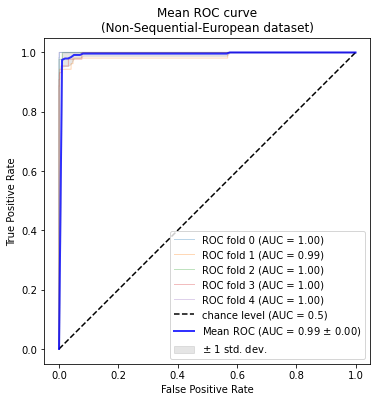

In [25]:
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

kf = KFold(n_splits=5, shuffle = True,random_state=0)
X=osvm_res.copy()
X.reset_index(drop=True,inplace=True)
y=osvm_t.copy()
y.reset_index(drop=True,inplace=True)
f1=[]
acc=[]
recall=[]
precision=[]
AUC=[]
prs = []
aucs = []
k=0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    ros = SMOTE(random_state=0,sampling_strategy=0.0526315789)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    clf = LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01,num_iterations=400,
               max_bin=100, max_depth=16, metric='f1', min_child_samples=100,
               min_child_weight=0,num_leaves=1000,subsample_freq=0);
    clf.fit(X_resampled,y_resampled)
    preds = clf.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
    AUC.append(metrics.auc(fpr, tpr))
    f1.append(f1_score(y_test, preds))
    acc.append(accuracy_score(y_test, preds))
    recall.append(recall_score(y_test,preds))
    precision.append(precision_score(y_test, preds))
    viz = RocCurveDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        name=f"ROC fold {k}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    k+=1
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
print("Mean ACC: ",mean(acc)," Mean precision: ",mean(precision)," Mean Recall: ",mean(recall)," Mean F1: ",mean(f1)," Mean AUC: ",mean(AUC))
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
title=f"Mean ROC curve\n(Non-Sequential-European dataset)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()